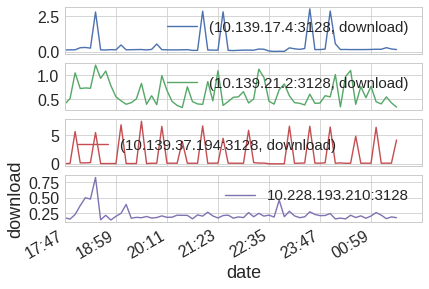

In [184]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_NAME = "inputs"
MAX_ROUNDS = 70
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')
INPUT_DIR = os.path.join( os.getcwd(), 'inputs')

headers = ['date', 'download', 'code'] 
dtypes = [pd.datetime, float, float]

##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15
linestyles = (':','-','.','--')

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})

#Read input files from the directory and returns DataTable object in a combined list
def read_inputs():
    #Get list of nodes(files) with results
    nodes = [f for f in os.listdir(INPUT_DIR) if os.path.isfile(os.path.join(INPUT_DIR, f))]
    #Load results from each node
    nodes_results = {}
    for node in nodes:
        f = os.path.join(INPUT_DIR,node)
        try:
            nodes_results[node] = pd.read_csv(f,  usecols=["date", "download"],
                                              parse_dates=['date'], index_col=0)
            
            nodes_results[node] = nodes_results[node].replace('None',np.nan)
        except Exception:
            print('EXception')
    return nodes_results    



def plot_var_per_round(results, var):
    """Plot the median acrros nodes of a variable"""
    median = getMedianDF(results,var)
    #Create new figure
    fig = plt.figure()
    #Print the plot
    median.plot()
    #Modify parameters
    plt.ylabel(var)
    #plt.xlabel('Date')
    plt.xlim(0,MAX_ROUNDS)
    plt.show()

# Plot results to the separately
def plot_separately(results,y_label, legends):
    df = pd.concat(results,axis=1)
    df.index = df.index.to_series().dt.strftime('%H:%M')
    df.plot(subplots=True)
    plt.ylabel(y_label)
    plt.legend(legends, loc ="upper right")
    plt.xlim(0,MAX_ROUNDS)
    plt.show()
    
######### Assistant functions###############

def getMedianDF(nodes_results,var):
    """"Helper function that extracts median time series of the var accross the various nodes"""
    series = []
    total=0
    count=0
    for name,r in nodes_results.items():
        s = r.groupby('date',axis=1).mean()[var]
        total+=s.mean()
        count+=1
        s.name = name
        series.append(s)
    #try:
    df = pd.concat(series,axis=1)
    #except:
        #ipdb.set_trace()
    median = df.median(axis=1)
    median.name = var
    return median

if __name__ == '__main__':
    nodes_results = read_inputs()
    #print(nodes_results)
    plot_separately(nodes_results, 'download', list(nodes_results))
    